<a href="https://colab.research.google.com/github/Ajay2903/Machine-Learning/blob/main/Churn_dataset_DT_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split 

In [45]:
data = pd.read_csv('churn_prediction.csv')
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [46]:
X = data.drop(columns = ['customer_id','churn'])

In [47]:
Y = data['churn']

In [48]:
X.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16
2,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75
3,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98
4,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04


In [49]:
data[['city','churn']].groupby(by = 'city',).mean()

,churn
city,
0.0,0.250000
1.0,0.000000
2.0,1.000000
5.0,0.000000
6.0,0.000000
...,...
1645.0,0.200000
1646.0,1.000000
1647.0,0.000000


Different means specify that some cities have a very high rate of churn while others have a very low rate.

In [146]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.3)

Normalizing features for model_training

In [220]:
columnx = xtrain.columns
norm = Normalizer()
xtrain = norm.fit_transform(xtrain)

In [221]:
xtest = norm.transform(xtest)

In [150]:
xtrain = pd.DataFrame(xtrain,columns = columnx)

In [152]:
xtest = pd.DataFrame(xtest,columns = columnx)

In [156]:
from sklearn.tree import DecisionTreeClassifier as DT

Using Random Hyperparameter values at the beginning

In [222]:
model = DT(max_depth = 50,min_samples_split = 10,class_weight='balanced')

In [223]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [224]:
predicted = model.predict(xtest)

In [160]:

from sklearn.metrics import f1_score as f1s

In [161]:
f1s(ytest,predicted)

0.4506849315068493

In [162]:
predictedtr = model.predict(xtrain)

In [163]:
f1s(ytrain,predictedtr)

0.8741859088217881

### **Declaring functions score and iterate to facilitate hyperparameter tuning**

In [164]:
def score(model,x1,y1,x2,y2):
  model.fit(x1,y1)
  pred = model.predict(x1)
  sc1 = f1s(y1,pred)
  pred = model.predict(x2)
  sc2 = f1s(y2,pred)
  return sc1,sc2

In [165]:
def plot(train_s,test_s,x_axis,title):
  plt.figure(figsize = (10,10),dpi=90)
  plt.plot(x_axis,train_score,color='red',label='train_score')
  plt.plot(x_axis,test_score,color='green',label='test_score')
  plt.title(title)
  plt.legend()
  plt.xlabel('paramenter value')
  plt.ylabel('f1 score')
  plt.show()


In [166]:
train_score = []
test_score = []
for i in range(1,100):
  model = DT(class_weight = 'balanced',max_depth = i,random_state = 42)
  f1,f2 = score(model,xtrain,ytrain,xtest,ytest)
  train_score.append(f1)
  test_score.append(f2)

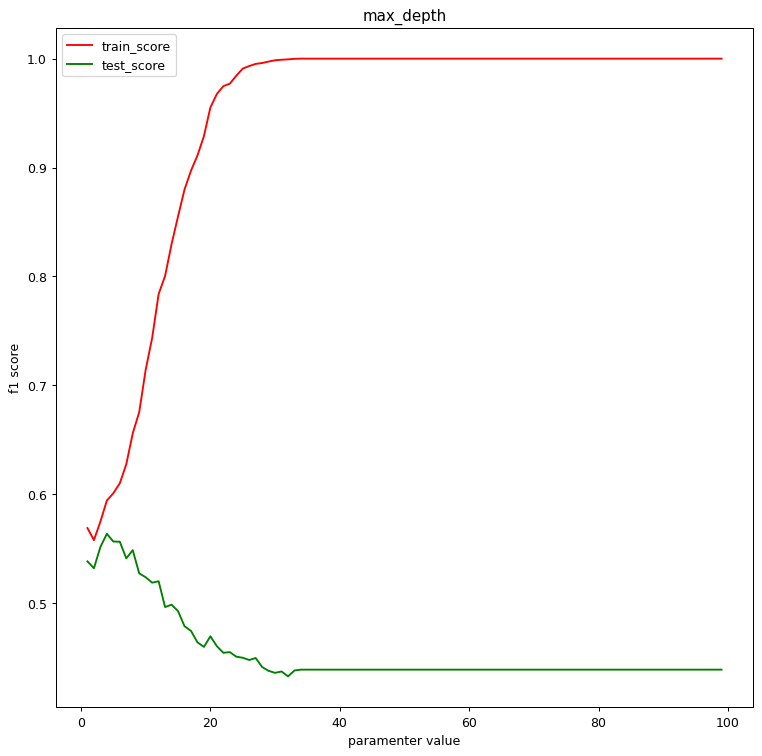

In [167]:
plot(train_score,test_score,range(1,100),'max_depth')

**Maximum of test score reached at max_depth  = 5. During max_depth>5, model Overfits the training data and test f1 score decreases shaprly.**

Peforming same operation to find optimal min_sample_split and max_leaf_node

In [168]:
train_score = []
test_score = []
for i in range(75,200):
  model = DT(class_weight = 'balanced',min_samples_split=i,random_state = 42)
  f1,f2 = score(model,xtrain,ytrain,xtest,ytest)
  train_score.append(f1)
  test_score.append(f2)

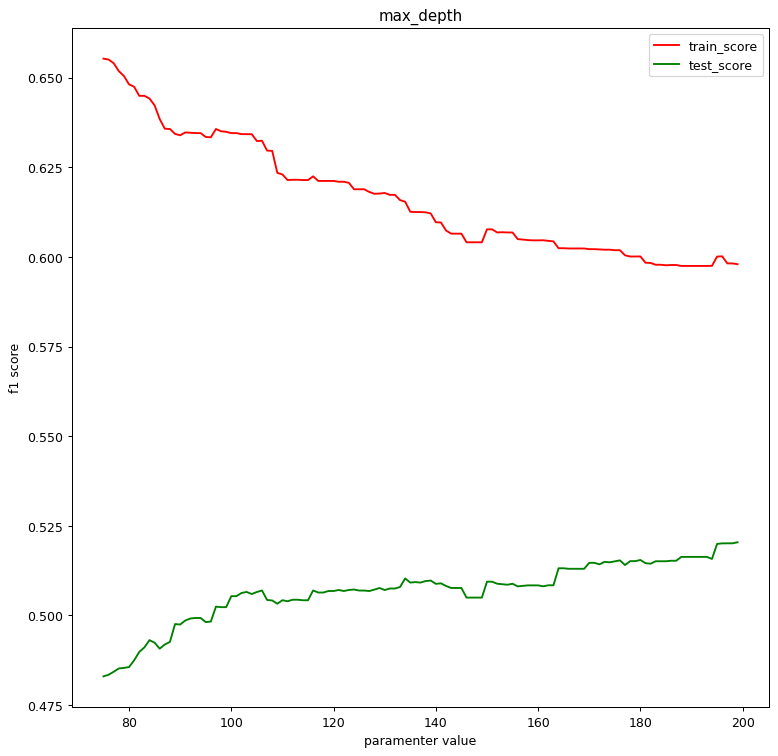

In [169]:
plot(train_score,test_score,range(75,200),'max_depth')

**Both train score and test score saturates after min_sample_split = 160**


Now finding optimal max_leaf_node

In [171]:
train_score = []
test_score = []
for i in range(2,50):
  model = DT(class_weight = 'balanced',max_leaf_nodes=i,random_state = 42)
  f1,f2 = score(model,xtrain,ytrain,xtest,ytest)
  train_score.append(f1)
  test_score.append(f2)

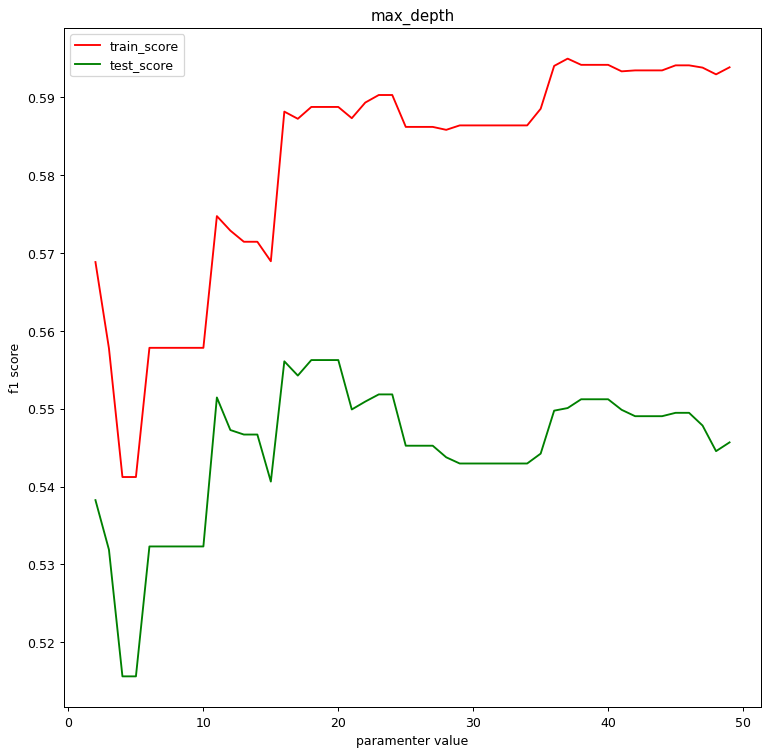

In [172]:
plot(train_score,test_score,range(2,50),'max_depth')

**Maximum test_score for max_leaf_nodes = 16. Difference between train_score and test_score in acceptable range.**

In [173]:
###Training model with optimal parameters.

In [214]:
model = DT(max_depth = 5,min_samples_split = 160,max_leaf_nodes=16,class_weight='balanced')

In [215]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=160,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [216]:
Final_predictions = model.predict(xtest)

In [217]:
from sklearn.metrics import classification_report

In [218]:
print(classification_report(ytest,Final_predictions))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      5332
           1       0.48      0.67      0.56      1289

    accuracy                           0.79      6621
   macro avg       0.70      0.75      0.71      6621
weighted avg       0.83      0.79      0.81      6621



In [219]:
f1s(ytest,Final_predictions)

0.5591955887122932

Text(0.5, 1.0, 'Feature Weightage')

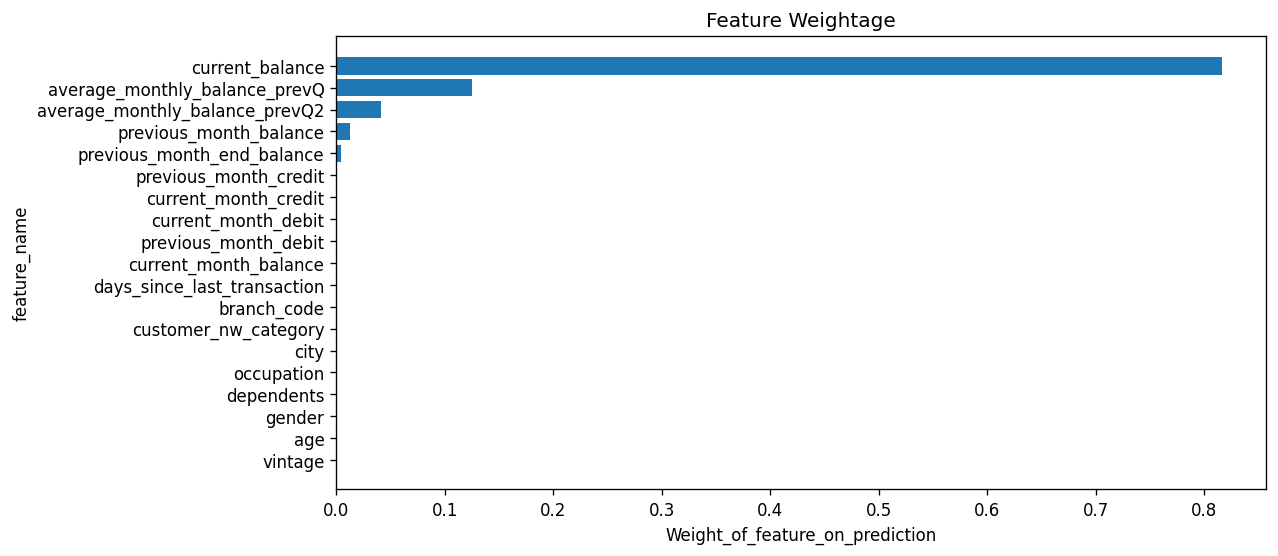

In [194]:
features = pd.Series(model.feature_importances_,index = xtrain.columns)
f = features.sort_values()
plt.figure(figsize = (10,5),dpi = 120)
plt.barh(f.index,f)
plt.xlabel('Weight_of_feature_on_prediction')
plt.ylabel('feature_name')
plt.title('Feature Weightage')